# BANK MARKETING

# Información:

Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si al producto (depósito a plazo bancario) estaría 'yes' o no 'no' suscrito.

# Conjunto de datos de Marketing Bancario:

https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Miguel Angel/Desktop/R-Logística/Bank_Train.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# Separamos variables numericas y categoricas 
columnsNumeric   = ['age','balance','day','duration','campaign','pdays','previous']
columnsCategoric = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [7]:
# No existen valores nulos
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Pasando las variables categóricas y numéricas a un dataframe
df_categoric = df[columnsCategoric]
df_numeric   = df[columnsNumeric]

In [9]:
# Describiendo las estadísticas básicas
df_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Función de diagnóstico mediante gráficas

In [10]:
from scipy import stats

def diagnostic_plot(df, variable):
    # Define el tamaño de la grafica
    plt.figure(figsize = (22,4))
    
    # Histograma
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histograma')
    
    # Grafica Q-Q
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    #plt.ylabel('Cuantiles de la variable')
    
    # Grafica de Caja
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Grafico de Cajas')

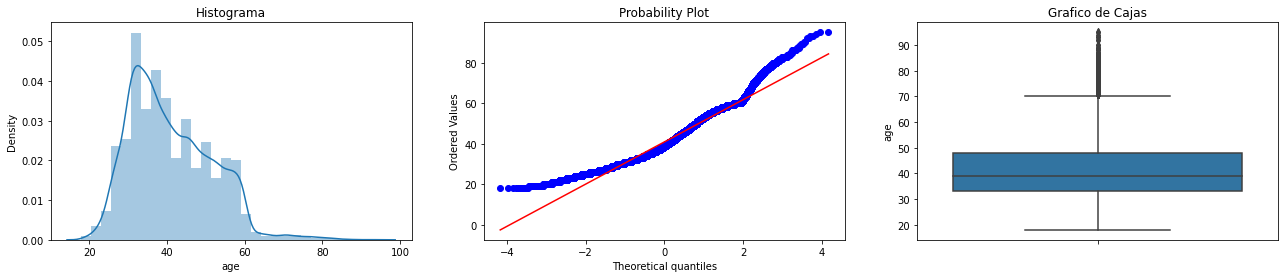

In [11]:
diagnostic_plot(df, 'age')

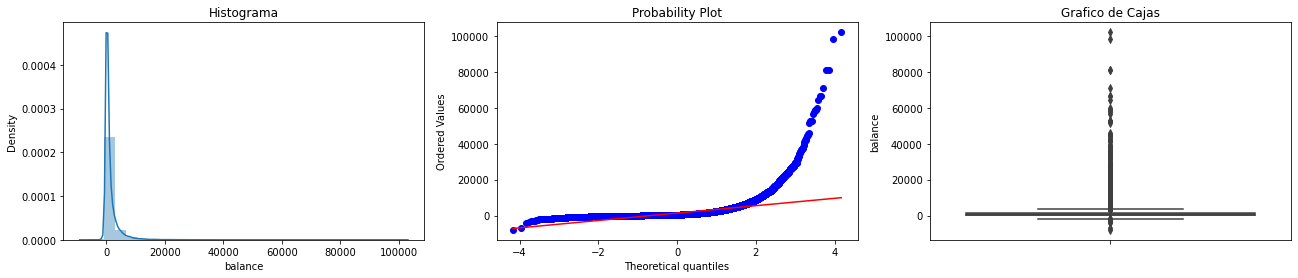

In [12]:
diagnostic_plot(df, 'balance')

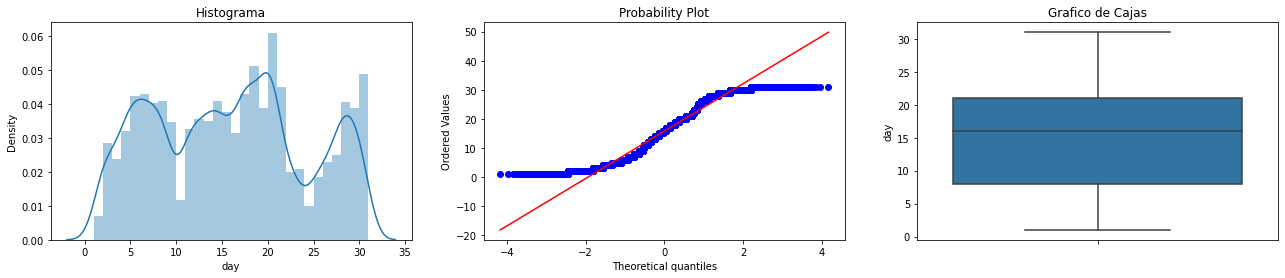

In [13]:
diagnostic_plot(df, 'day')

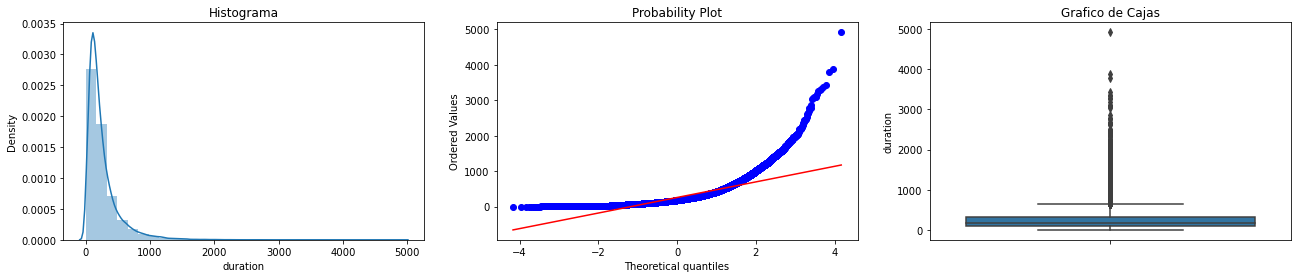

In [14]:
diagnostic_plot(df, 'duration')

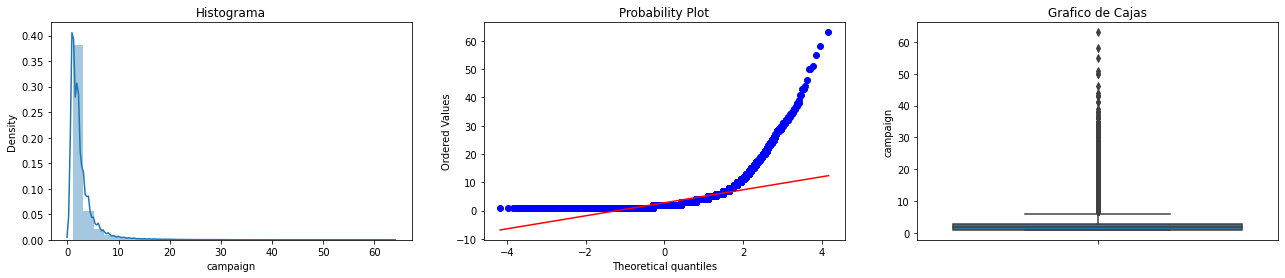

In [15]:
diagnostic_plot(df, 'campaign')

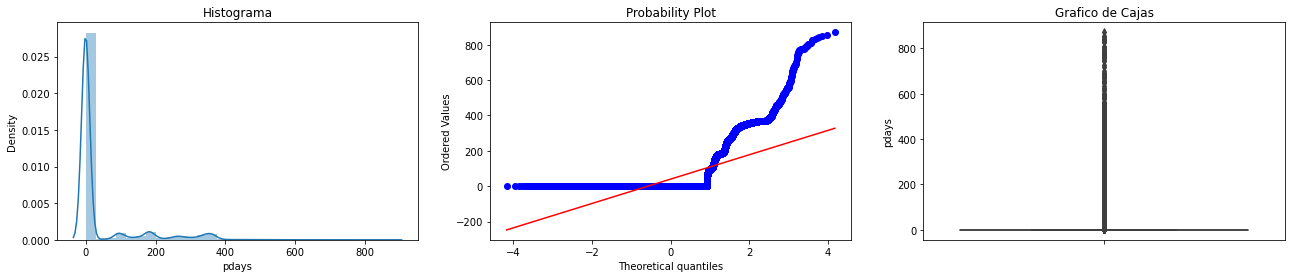

In [16]:
diagnostic_plot(df, 'pdays')

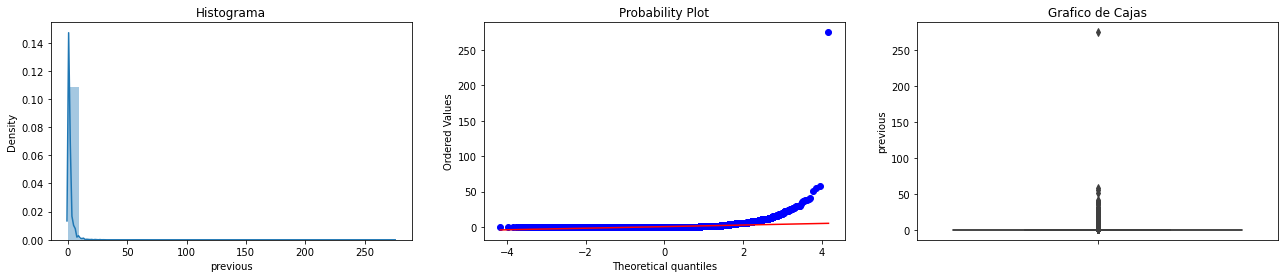

In [17]:
diagnostic_plot(df, 'previous') 

# Función distancia entre cuartiles

In [18]:
def dist_inter_cuartil(df, variable, distancia):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    limite_inf = df[variable].quantile(0.25) - (IQR * distancia)
    limite_sup = df[variable].quantile(0.75) + (IQR * distancia)
    
    return limite_sup, limite_inf

# Encontramos los límites para las variables

In [19]:
# Encontremos los límites superior e inferior para la variable 'age'

age_limite_sup, age_limite_inf = dist_inter_cuartil( df ,'age' , 1.5)
age_limite_sup, age_limite_inf

(70.5, 10.5)

In [20]:
# Encontremos los límites superior e inferior para la variable 'balance'

balance_limite_sup, balance_limite_inf = dist_inter_cuartil( df ,'balance' , 1.5)
balance_limite_sup, balance_limite_inf

(3462.0, -1962.0)

In [21]:
# Encontremos los límites superior e inferior para la variable 'day'

day_limite_sup, day_limite_inf = dist_inter_cuartil( df ,'day' , 1.5)
day_limite_sup, day_limite_inf

(40.5, -11.5)

In [22]:
# Encontremos los límites superior e inferior para la variable 'duration'

duration_limite_sup, duration_limite_inf = dist_inter_cuartil( df ,'duration' , 1.5)
duration_limite_sup, duration_limite_inf

(643.0, -221.0)

In [23]:
# Encontremos los límites superior e inferior para la variable 'campaign'

campaign_limite_sup, campaign_limite_inf = dist_inter_cuartil( df ,'campaign' , 1.5)
campaign_limite_sup, campaign_limite_inf

(6.0, -2.0)

# Reemplazamos los valores extremos 

In [24]:
# Reemplazando los valores extremos de la variabe 'age' por 
# los límites máximos y mínimos

df['age'] = np.where(df['age'] > age_limite_sup, age_limite_sup,
                   np.where(df['age'] < age_limite_inf, age_limite_inf, df['age']))

In [25]:
# Reemplazando los valores extremos de la variabe 'balance' por 
# los límites máximos y mínimos

df['balance'] = np.where(df['balance'] > balance_limite_sup, balance_limite_sup,
                   np.where(df['balance'] < balance_limite_inf, balance_limite_inf, df['balance']))

In [26]:
# Reemplazando los valores extremos de la variabe 'day' por 
# los límites máximos y mínimos

df['day'] = np.where(df['day'] > day_limite_sup, day_limite_sup,
               np.where(df['day'] < day_limite_inf, day_limite_inf, df['day']))

In [27]:
# Reemplazando los valores extremos de la variabe 'duration' por 
# los límites máximos y mínimos

df['duration'] = np.where(df['duration'] > duration_limite_sup, duration_limite_sup,
                    np.where(df['duration'] < duration_limite_inf, duration_limite_inf, df['duration']))

In [28]:
# Reemplazando los valores extremos de la variabe 'campaign' por 
# los límites máximos y mínimos

df['campaign'] = np.where(df['campaign'] > campaign_limite_sup, campaign_limite_sup,
                    np.where(df['campaign'] < campaign_limite_inf, duration_limite_inf, df['campaign']))

# Gráfica al eliminar los outliers

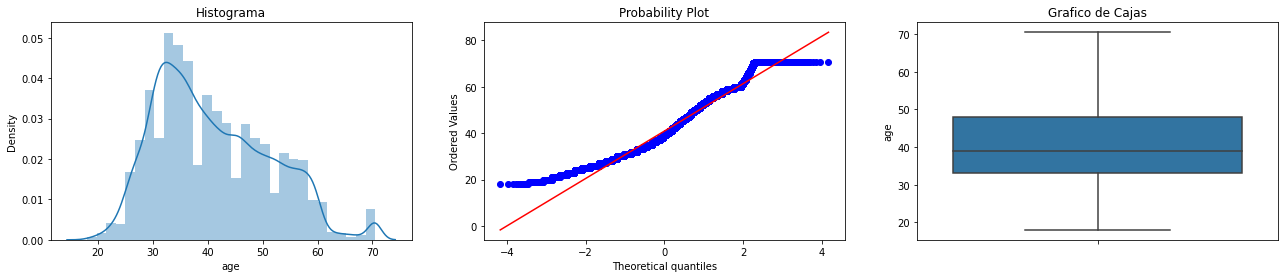

In [29]:
diagnostic_plot(df,'age')

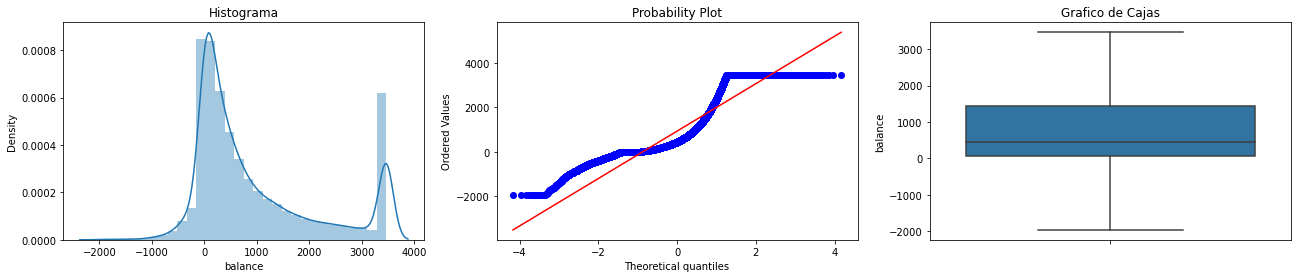

In [30]:
diagnostic_plot(df, 'balance')

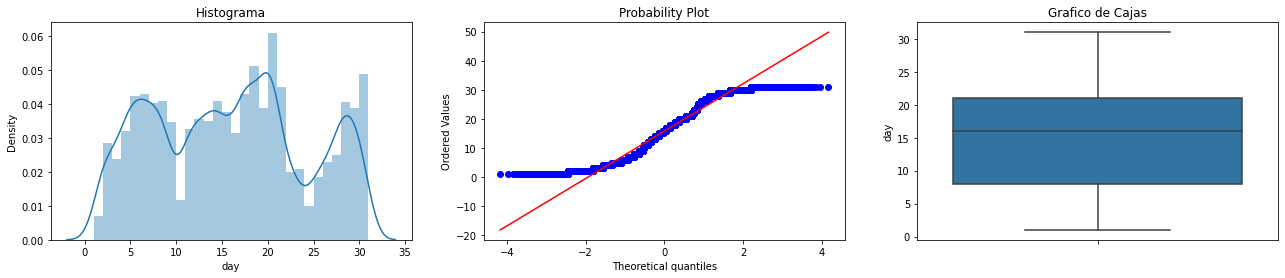

In [31]:
diagnostic_plot(df, 'day')

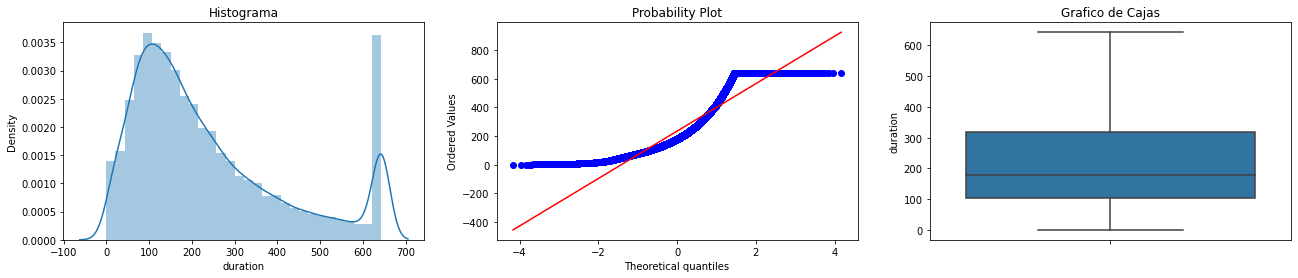

In [32]:
diagnostic_plot(df, 'duration')

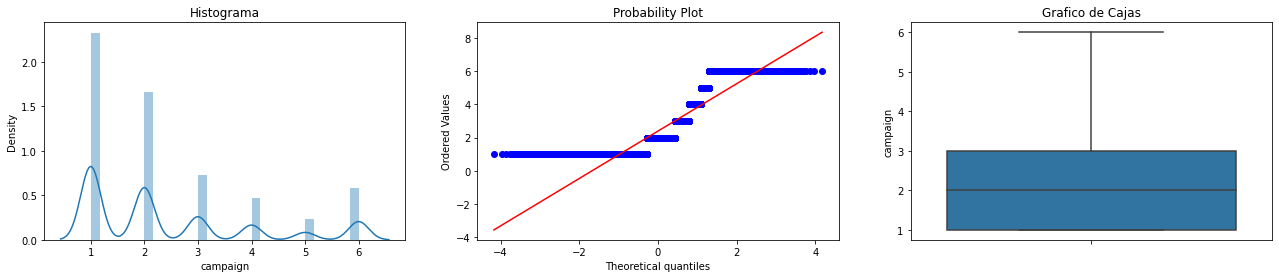

In [33]:
diagnostic_plot(df,'campaign')

In [34]:
# Tratamiento de variables categoricas (Label Encoder)
from sklearn.preprocessing import LabelEncoder

for colname in df_categoric:
    print(colname)
    encoder = LabelEncoder()
    encoder.fit(df_categoric[colname])
    df_categoric[colname] = encoder.transform(df_categoric[colname])

job
marital
education
default
housing
loan
contact
month
poutcome
y


In [35]:
df_categoric.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [36]:
# Concatenamos las variables numéricas y categóricas 
df1 = pd.concat([df_numeric, df_categoric], axis=1)
df1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


# Observando la correlación de las variables

In [37]:
corr_matrix = df1.corr(method='pearson')
corr_matrix

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.021868,-0.403240,-0.106807,-0.017879,-0.185513,-0.015655,0.026221,-0.042357,0.007367,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.018232,0.002122,0.064514,-0.066745,-0.068768,-0.084350,-0.027273,0.019777,-0.020967,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.022856,-0.005261,0.022671,0.009424,-0.027982,0.011370,-0.027936,-0.006028,0.083460,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.004744,0.011852,0.001935,-0.010021,0.005075,-0.012412,-0.020839,0.006314,0.010925,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.006839,-0.008994,0.006255,0.016822,-0.023599,0.009980,0.019614,-0.110031,0.101588,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.024455,0.019172,0.000052,-0.029979,0.124178,-0.022754,-0.244816,0.033065,-0.858362,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.000911,0.014973,0.017570,-0.018329,0.037076,-0.011043,-0.147811,0.022727,-0.489752,0.093236
job,-0.021868,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,1.000000,0.062045,0.166707,-0.006853,-0.125363,-0.033004,-0.082063,-0.092870,0.011010,0.040438
marital,-0.403240,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.062045,1.000000,0.108576,-0.007023,-0.016096,-0.046893,-0.039201,-0.006991,-0.016850,0.045588
education,-0.106807,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.166707,0.108576,1.000000,-0.010718,-0.090790,-0.048574,-0.110928,-0.057304,-0.019361,0.066241


# Matriz de Correlación

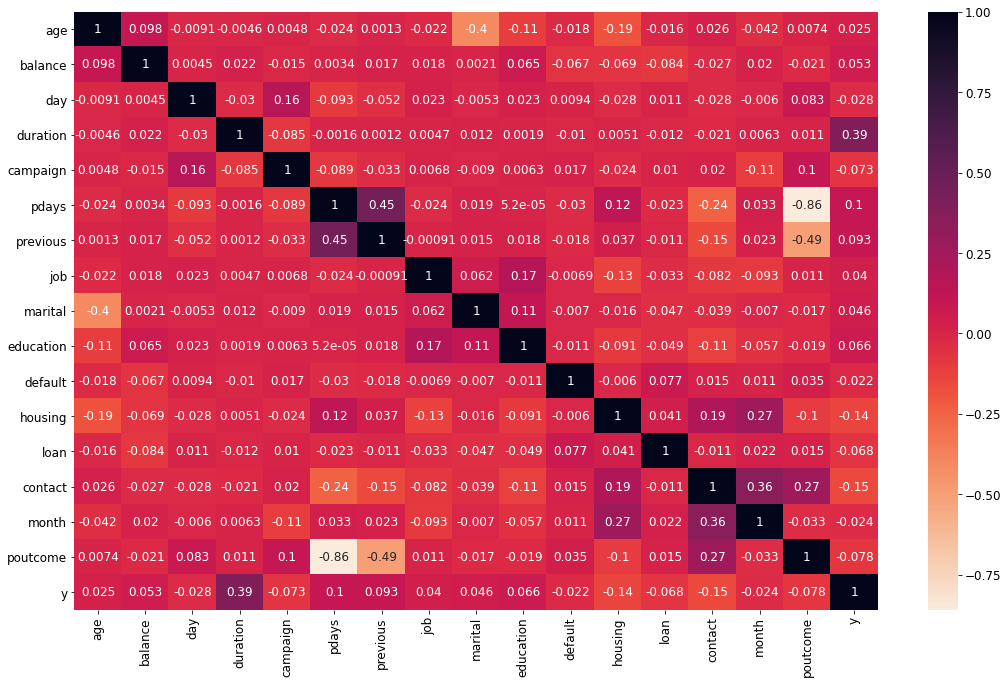

In [38]:
plt.rcParams['figure.figsize']= 18,11  
plt.rcParams['font.size'] = 12

df_small = df1.iloc[:,:17]
correlation = df_small.corr()
sns.heatmap(correlation, annot = True, cmap = sns.color_palette("rocket_r", as_cmap=True)) 
plt.show()

# No se eliminó ninguna variable, pues ninguna variable tiene correlación > 0.60 

# Balanceo por el método SMOTE

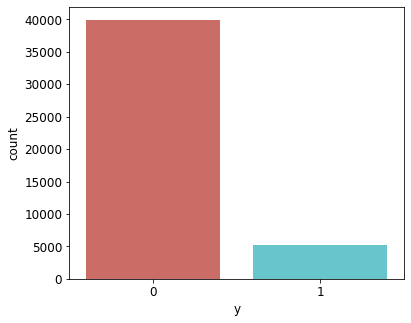

In [39]:
# Observando los datos sin balancear
plt.figure(figsize=(6,5))
sns.countplot(x='y', data = df1, palette = 'hls')
plt.show()

In [40]:
# Separando la variables predictoras y la variable predictiva 
X = df1.drop(['y'], axis=1)
y = df1['y']
X.shape, y.shape

((45211, 16), (45211,))

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [42]:
# Concatenando la información
df_balanceada = pd.concat([X_sm, y_sm], axis = 1)

In [43]:
df_balanceada.y.value_counts()

0    39922
1    39922
Name: y, dtype: int64

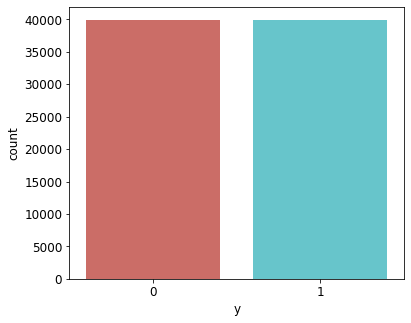

In [44]:
# Observando los datos balanceados
plt.figure(figsize=(6,5))
sns.countplot(x='y', data = df_balanceada, palette = 'hls')
plt.show()

In [45]:
# Separando la variables predictoras y la variable predictiva 
X1 = df_balanceada.drop(['y'], axis=1)
y1 = df_balanceada['y']
X1.shape, y1.shape

((79844, 16), (79844,))

# Estandarizando  

In [46]:
# Estandarizando las variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X1)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

In [47]:
X2 = X_scaler
y2 = y1
X2.shape, y2.shape

((79844, 16), (79844,))

# Prueba de significancia individual

In [48]:
import statsmodels.api as sm

model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:15:25   Log-Likelihood:                         -35664.
No. Observations:               79844   AIC:                                  7.136e+04
Df Residuals:                   79828   BIC:                                  7.151e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
# Eliminando la variable 'age'
X3 = X2.drop(['age'], axis=1)
y3 = y2
model = sm.OLS(y3, X3)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          1.328e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:15:34   Log-Likelihood:                         -35664.
No. Observations:               79844   AIC:                                  7.136e+04
Df Residuals:                   79829   BIC:                                  7.150e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
# Eliminando la variable 'day'
X4 = X3.drop(['day'], axis=1)
y4 = y3
model = sm.OLS(y4, X4)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          1.423e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:15:46   Log-Likelihood:                         -35666.
No. Observations:               79844   AIC:                                  7.136e+04
Df Residuals:                   79830   BIC:                                  7.149e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
# Partición de Datos: Train, Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X4, y4, stratify = y4,
                                                    test_size = 0.3, random_state = 100)

In [52]:
X_train.shape, y_train.shape 

((55890, 14), (55890,))

# Cross Validation

In [53]:
from sklearn.model_selection import GridSearchCV

# Definiendo parámetros a probar
parameters = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

In [54]:
from sklearn.linear_model import LogisticRegression
# Definiendo el modelo
reg_log = LogisticRegression(random_state = 100) 

In [55]:
# Ejecutando Grid Search
import time
inicio = time.time()

GridSearch = GridSearchCV( reg_log, parameters,
                           scoring = 'accuracy',
                           return_train_score = True,
                           n_jobs = 3)

GridSearch.fit(X_train, y_train)

fin = time.time()
print('El tiempo de ejecución es: ', fin-inicio, 'segundos') 

El tiempo de ejecución es:  9.618333339691162 segundos


In [56]:
# Mejores parámetros:
print('Los mejores parámetros son :', GridSearch.best_params_)
print('Con el mejor accuracy      :', GridSearch.best_score_)

Los mejores parámetros son : {'C': 100, 'penalty': 'l2'}
Con el mejor accuracy      : 0.8532474503488997


# Entrenando el modelo Regresión Logística

In [57]:
from sklearn.linear_model import LogisticRegression

clasifier = LogisticRegression( C=10, 
                                penalty = 'l2',
                                n_jobs = 4,
                                random_state = 100)

clasifier.fit(X_train, y_train)

LogisticRegression(C=10, n_jobs=4, random_state=100)

In [58]:
# Entrenando el algoritmo para validar
y_predict_train = clasifier.predict(X_train)     # Predicción sobre el train
y_predict_test  = clasifier.predict(X_test)      # Predicción sobre el test 

In [59]:
from sklearn.metrics import accuracy_score
# Calculando el Accurary 
print('Accuracy Train :', accuracy_score(y_train, y_predict_train))
print('Accuracy Test  :', accuracy_score(y_test, y_predict_test))

Accuracy Train : 0.8533905886562891
Accuracy Test  : 0.8504216414795024


In [60]:
# Calculando la precisión 
from sklearn.metrics import precision_score
print('Precisión train :', precision_score(y_train, y_predict_train))
print('Precisión test  :', precision_score(y_test, y_predict_test))

Precisión train : 0.8367374774098953
Precisión test  : 0.8330423742263133


In [61]:
# Calculando el recall
from sklearn.metrics import recall_score
print('Recall train :', recall_score(y_train, y_predict_train))
print('Recall test  :', recall_score(y_test, y_predict_test))

Recall train : 0.8781177312578279
Recall test  : 0.8765133171912833


In [62]:
# Cuadro comparativo para el Train
from sklearn.metrics import classification_report
report_train = classification_report(y_train, y_predict_train)
print(report_train) 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     27945
           1       0.84      0.88      0.86     27945

    accuracy                           0.85     55890
   macro avg       0.85      0.85      0.85     55890
weighted avg       0.85      0.85      0.85     55890



In [63]:
# Cuadro comparativo para el Test
report_test = classification_report(y_test, y_predict_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85     11977
           1       0.83      0.88      0.85     11977

    accuracy                           0.85     23954
   macro avg       0.85      0.85      0.85     23954
weighted avg       0.85      0.85      0.85     23954



In [64]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión train 
m_confusion_train = confusion_matrix(y_train, y_predict_train)
print('Matriz de Confusión train:')
m_confusion_train

Matriz de Confusión train:


array([[23157,  4788],
       [ 3406, 24539]], dtype=int64)

[Text(0, 0.5, 'Si producto'), Text(0, 1.5, 'No producto')]

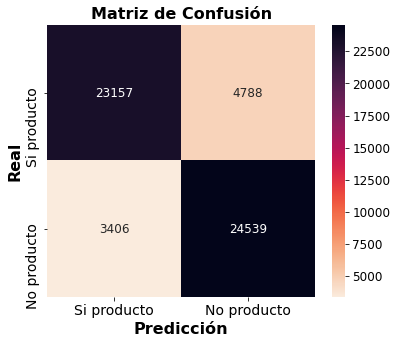

In [65]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_train, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)

In [66]:
# Matriz de confusión test 
m_confusion_test = confusion_matrix(y_test, y_predict_test)
print('Matriz de Confusión test:')
m_confusion_test

Matriz de Confusión test:


array([[ 9873,  2104],
       [ 1479, 10498]], dtype=int64)

[Text(0, 0.5, 'Si producto'), Text(0, 1.5, 'No producto')]

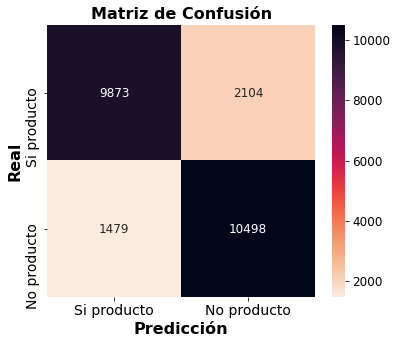

In [67]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_test, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)

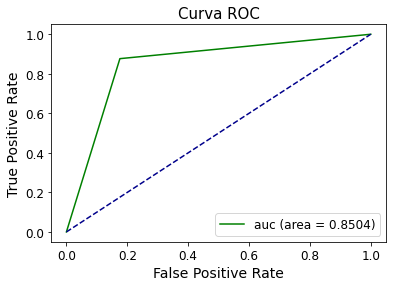

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_predict_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, color = 'green', label = 'auc (area = %0.4f)' % auc) 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Curva ROC', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.show()